<div align=center>

<p></p>
<p></p>
 <br/>
    <br/>
<font size=5 color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font size=5 color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Spring 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 5 - PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  June the 23rd


<br/>
<br/>
<b>
<font size=5>
Kian Izadpanah - 400104783
</font>
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [2]:
#TODO
df = pd.read_csv("/kaggle/input/nutrition/nutrition.csv")
print(len(df))

tmp_df = df.head(5)
tmp_df.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': [('background-color', '#99999999')]}]
)

8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",nan,nan,nan,717.000000,0.850000,81.110000,0.060000,0.060000,0.000000,684.000000,0.003000,0.170000,0.000000,2.320000,3.000000,0.042000,0.034000,0.005000,24.000000,0.000000,0.020000,2.000000,0.000000,24.000000,1.000000,0.090000,0.760000,0.001765,0.070833,0.000000,0.154667,0.007500,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",nan,nan,nan,717.000000,0.850000,81.110000,0.060000,0.060000,0.000000,684.000000,0.003000,0.130000,0.000000,2.320000,3.000000,0.042000,0.034000,0.005000,24.000000,0.016000,0.160000,2.000000,0.004000,23.000000,1.000000,0.050000,0.760000,0.001765,0.054167,0.000000,0.154667,0.007500,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",nan,nan,nan,876.000000,0.280000,99.480000,0.000000,0.000000,0.000000,840.000000,0.001000,0.010000,0.000000,2.800000,0.000000,0.003000,0.005000,0.001000,4.000000,0.001000,0.000000,0.000000,0.000000,3.000000,0.000000,0.010000,0.933333,0.000588,0.004167,0.000000,0.186667,0.000000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",nan,nan,nan,353.000000,21.400000,28.740000,2.340000,0.500000,0.000000,198.000000,0.166000,1.220000,0.000000,0.250000,36.000000,1.016000,0.382000,0.029000,528.000000,0.040000,0.310000,23.000000,0.009000,387.000000,14.500000,2.660000,0.220000,0.097647,0.508333,0.000000,0.016667,0.090000,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",nan,nan,nan,371.000000,23.240000,29.680000,2.790000,0.510000,0.000000,292.000000,0.065000,1.260000,0.000000,0.260000,20.000000,0.118000,0.351000,0.014000,674.000000,0.024000,0.430000,24.000000,0.012000,451.000000,14.500000,2.600000,0.324444,0.038235,0.525000,0.000000,0.017333,0.050000,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [3]:
#TODO
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

print("columns are:\n")
print(df.columns.tolist())
print("=========================================================================================")
print("=========================================================================================")
print("info:\n")
print(df.info())
print("=========================================================================================")
print("=========================================================================================")
print("counts of missing values in each column are:\n")
print(df.isnull().sum())
print("=========================================================================================")
print("=========================================================================================")
print("descriptions of the data:\n")
print(df.describe())
print("=========================================================================================")
print("=========================================================================================")

columns are:

['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']
info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 

Exclude the non-numeric features (you will need these features later in the notebook).

In [4]:
#TODO
df.set_index("ID", inplace=True)
numeric_df = pd.DataFrame(df.select_dtypes(include=[np.number]))
tmp_df = numeric_df.head(5)
tmp_df.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': [('background-color', '#99999999')]}]
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,717.000000,0.850000,81.110000,0.060000,0.060000,0.000000,684.000000,0.003000,0.170000,0.000000,2.320000,3.000000,0.042000,0.034000,0.005000,24.000000,0.000000,0.020000,2.000000,0.000000,24.000000,1.000000,0.090000,0.760000,0.001765,0.070833,0.000000,0.154667,0.007500,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.000000,0.850000,81.110000,0.060000,0.060000,0.000000,684.000000,0.003000,0.130000,0.000000,2.320000,3.000000,0.042000,0.034000,0.005000,24.000000,0.016000,0.160000,2.000000,0.004000,23.000000,1.000000,0.050000,0.760000,0.001765,0.054167,0.000000,0.154667,0.007500,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.000000,0.280000,99.480000,0.000000,0.000000,0.000000,840.000000,0.001000,0.010000,0.000000,2.800000,0.000000,0.003000,0.005000,0.001000,4.000000,0.001000,0.000000,0.000000,0.000000,3.000000,0.000000,0.010000,0.933333,0.000588,0.004167,0.000000,0.186667,0.000000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.000000,21.400000,28.740000,2.340000,0.500000,0.000000,198.000000,0.166000,1.220000,0.000000,0.250000,36.000000,1.016000,0.382000,0.029000,528.000000,0.040000,0.310000,23.000000,0.009000,387.000000,14.500000,2.660000,0.220000,0.097647,0.508333,0.000000,0.016667,0.090000,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.000000,23.240000,29.680000,2.790000,0.510000,0.000000,292.000000,0.065000,1.260000,0.000000,0.260000,20.000000,0.118000,0.351000,0.014000,674.000000,0.024000,0.430000,24.000000,0.012000,451.000000,14.500000,2.600000,0.324444,0.038235,0.525000,0.000000,0.017333,0.050000,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

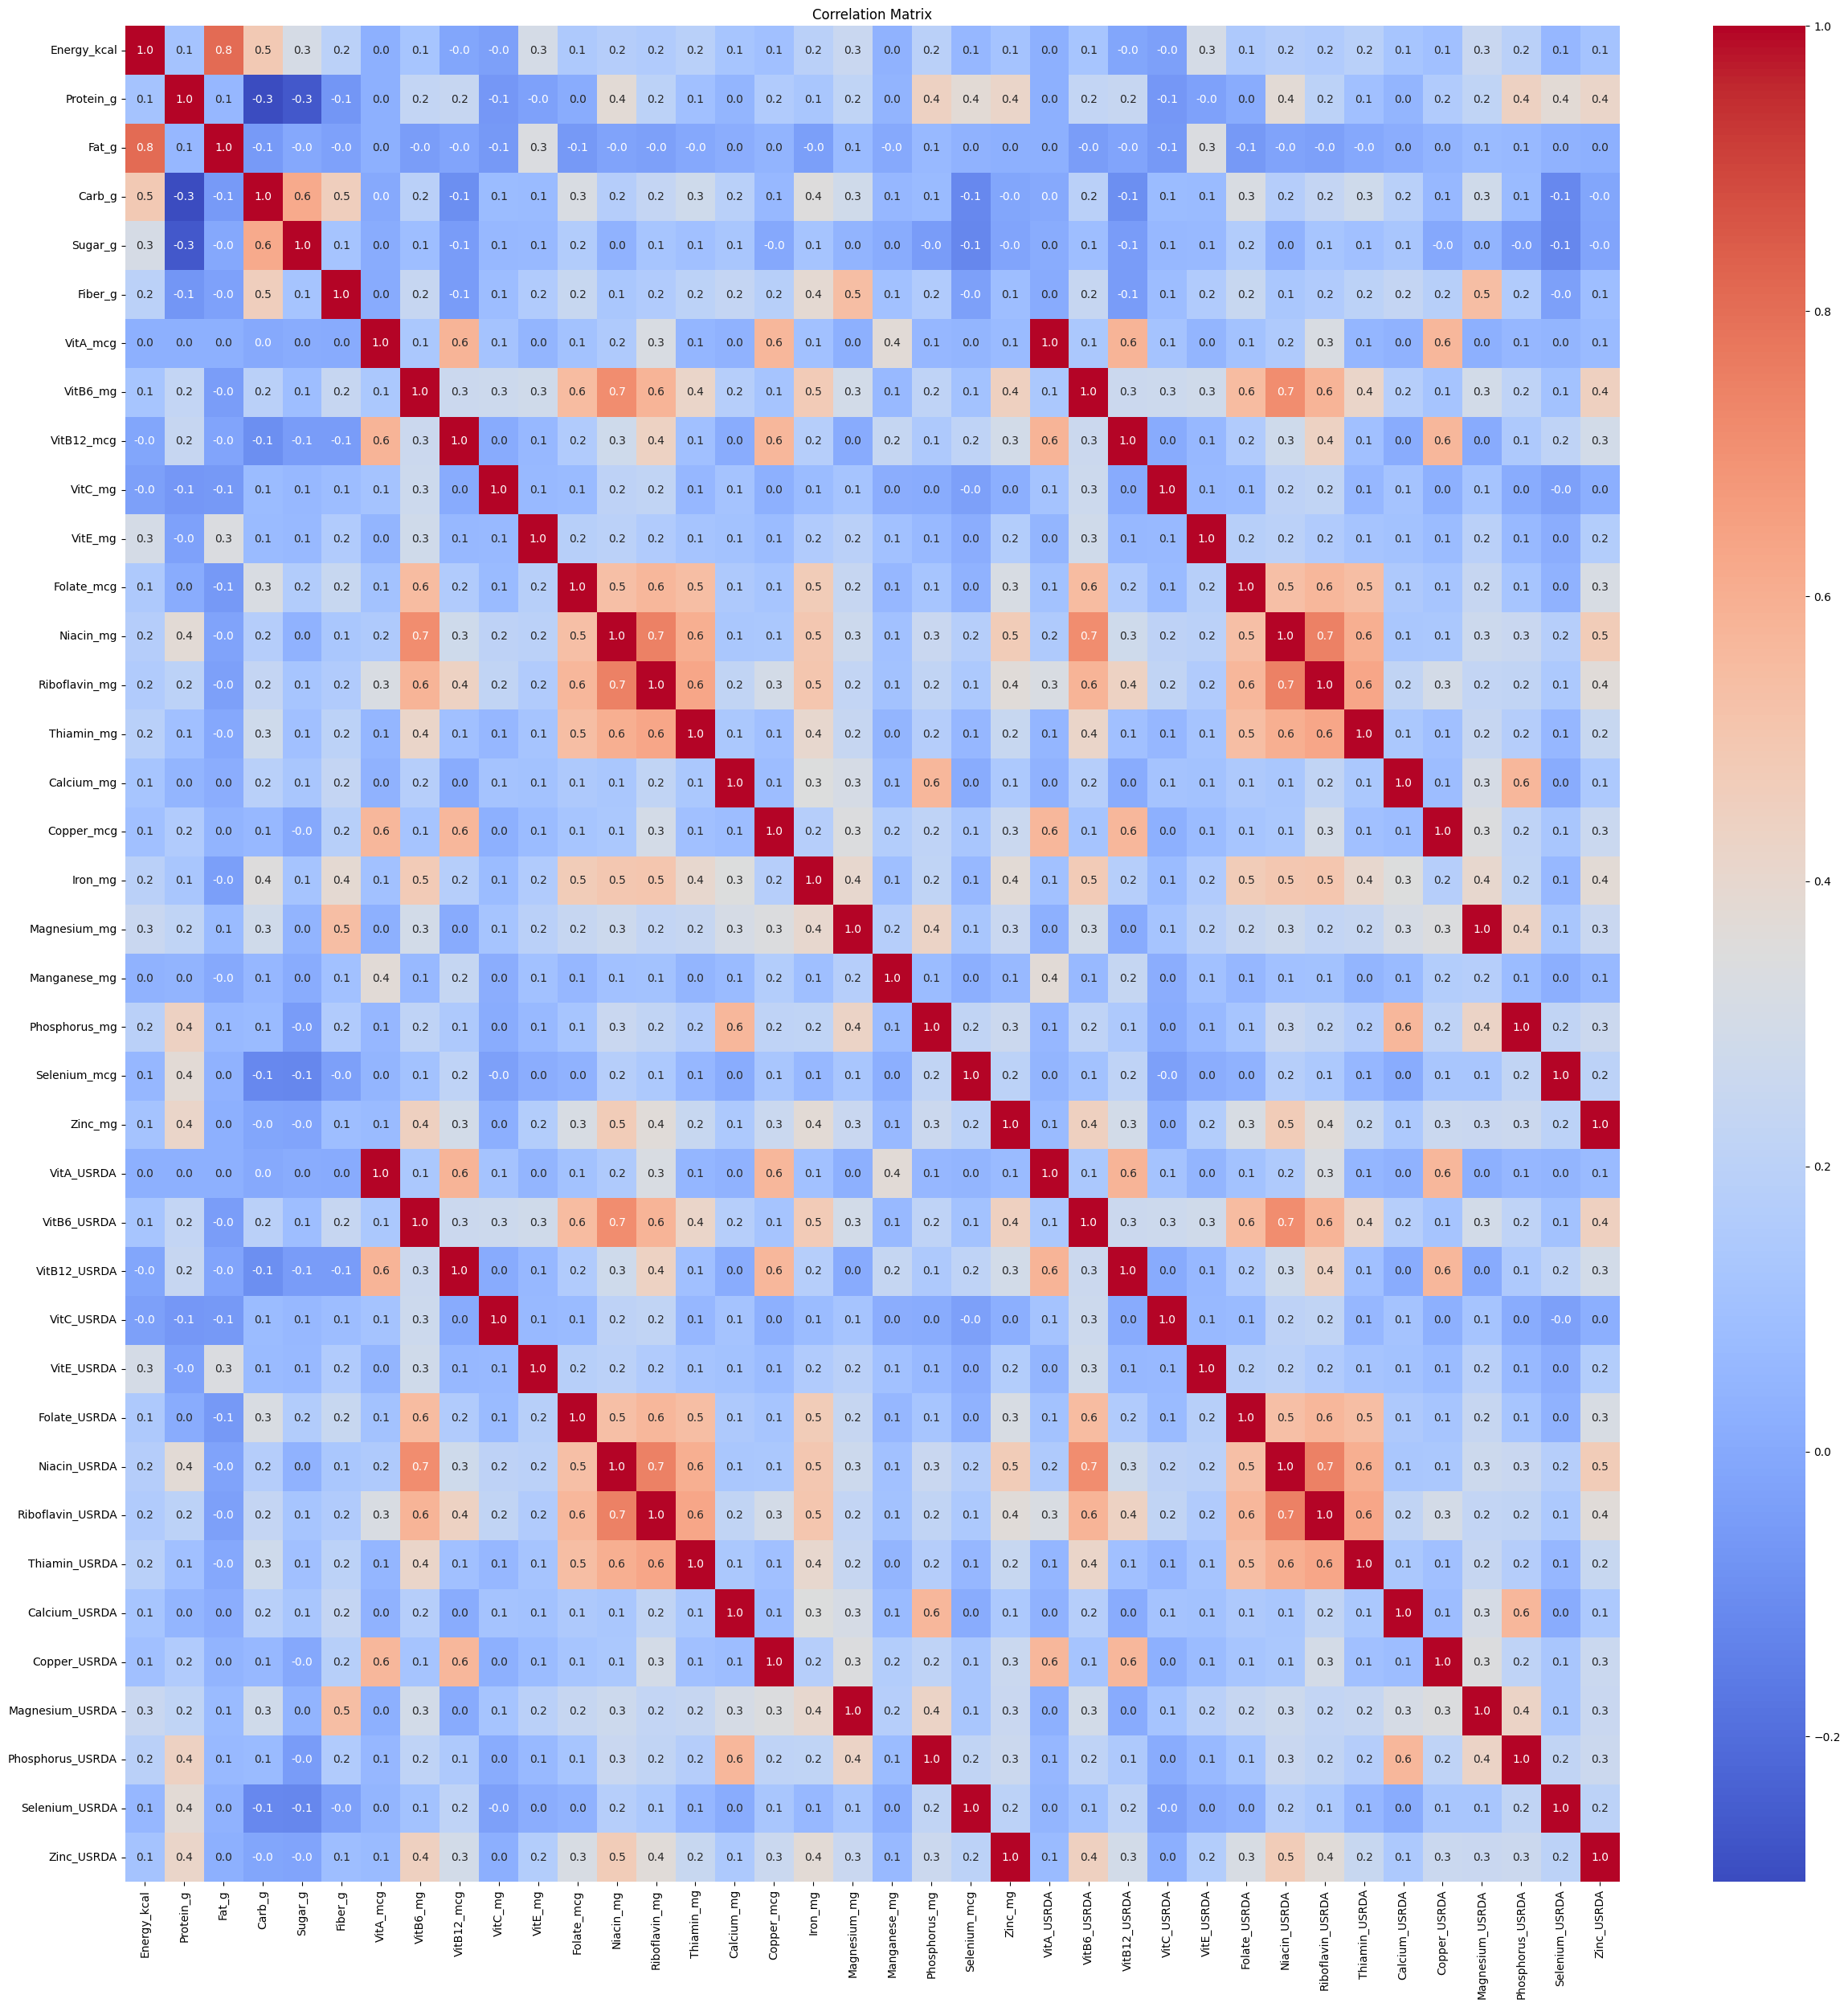

In [5]:
#TODO
corr_matrix = numeric_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

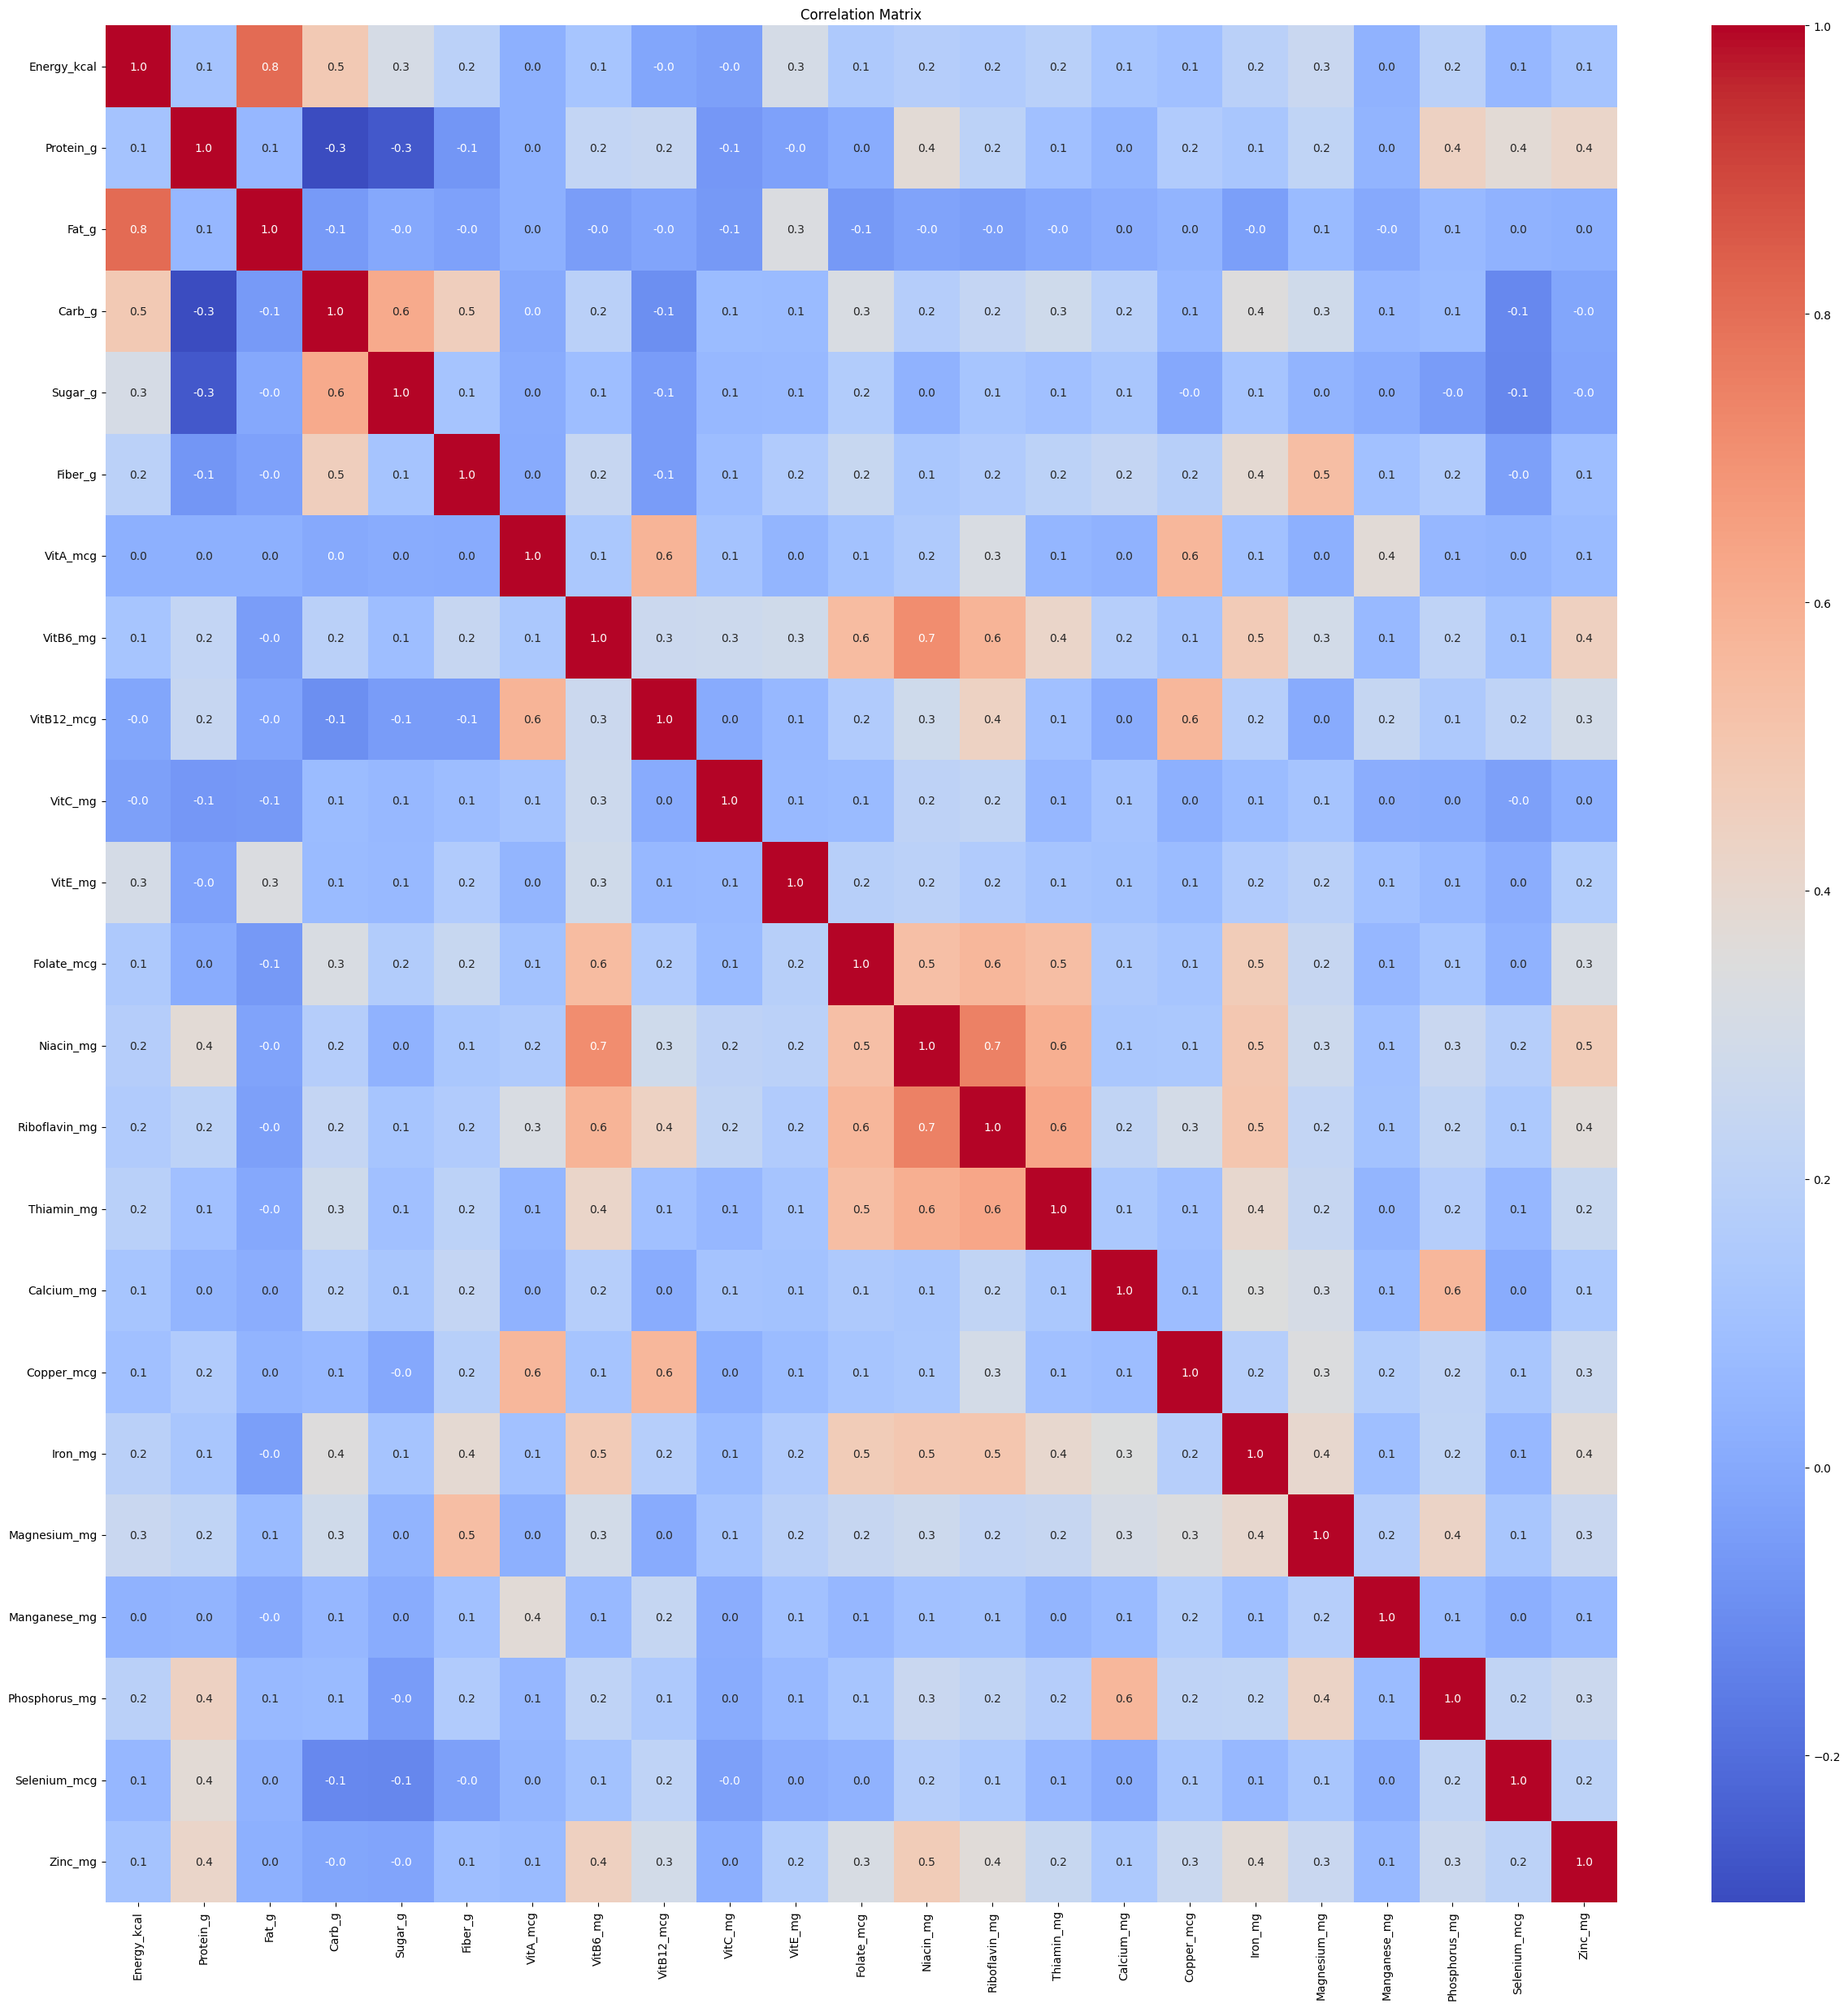

In [6]:
redundant_pairs = set()
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            redundant_pairs.add((corr_matrix.index[i], corr_matrix.columns[j]))

features_to_remove = {pair[1] for pair in redundant_pairs}
reduced_df = numeric_df.drop(columns=features_to_remove)

corr_matrix = reduced_df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

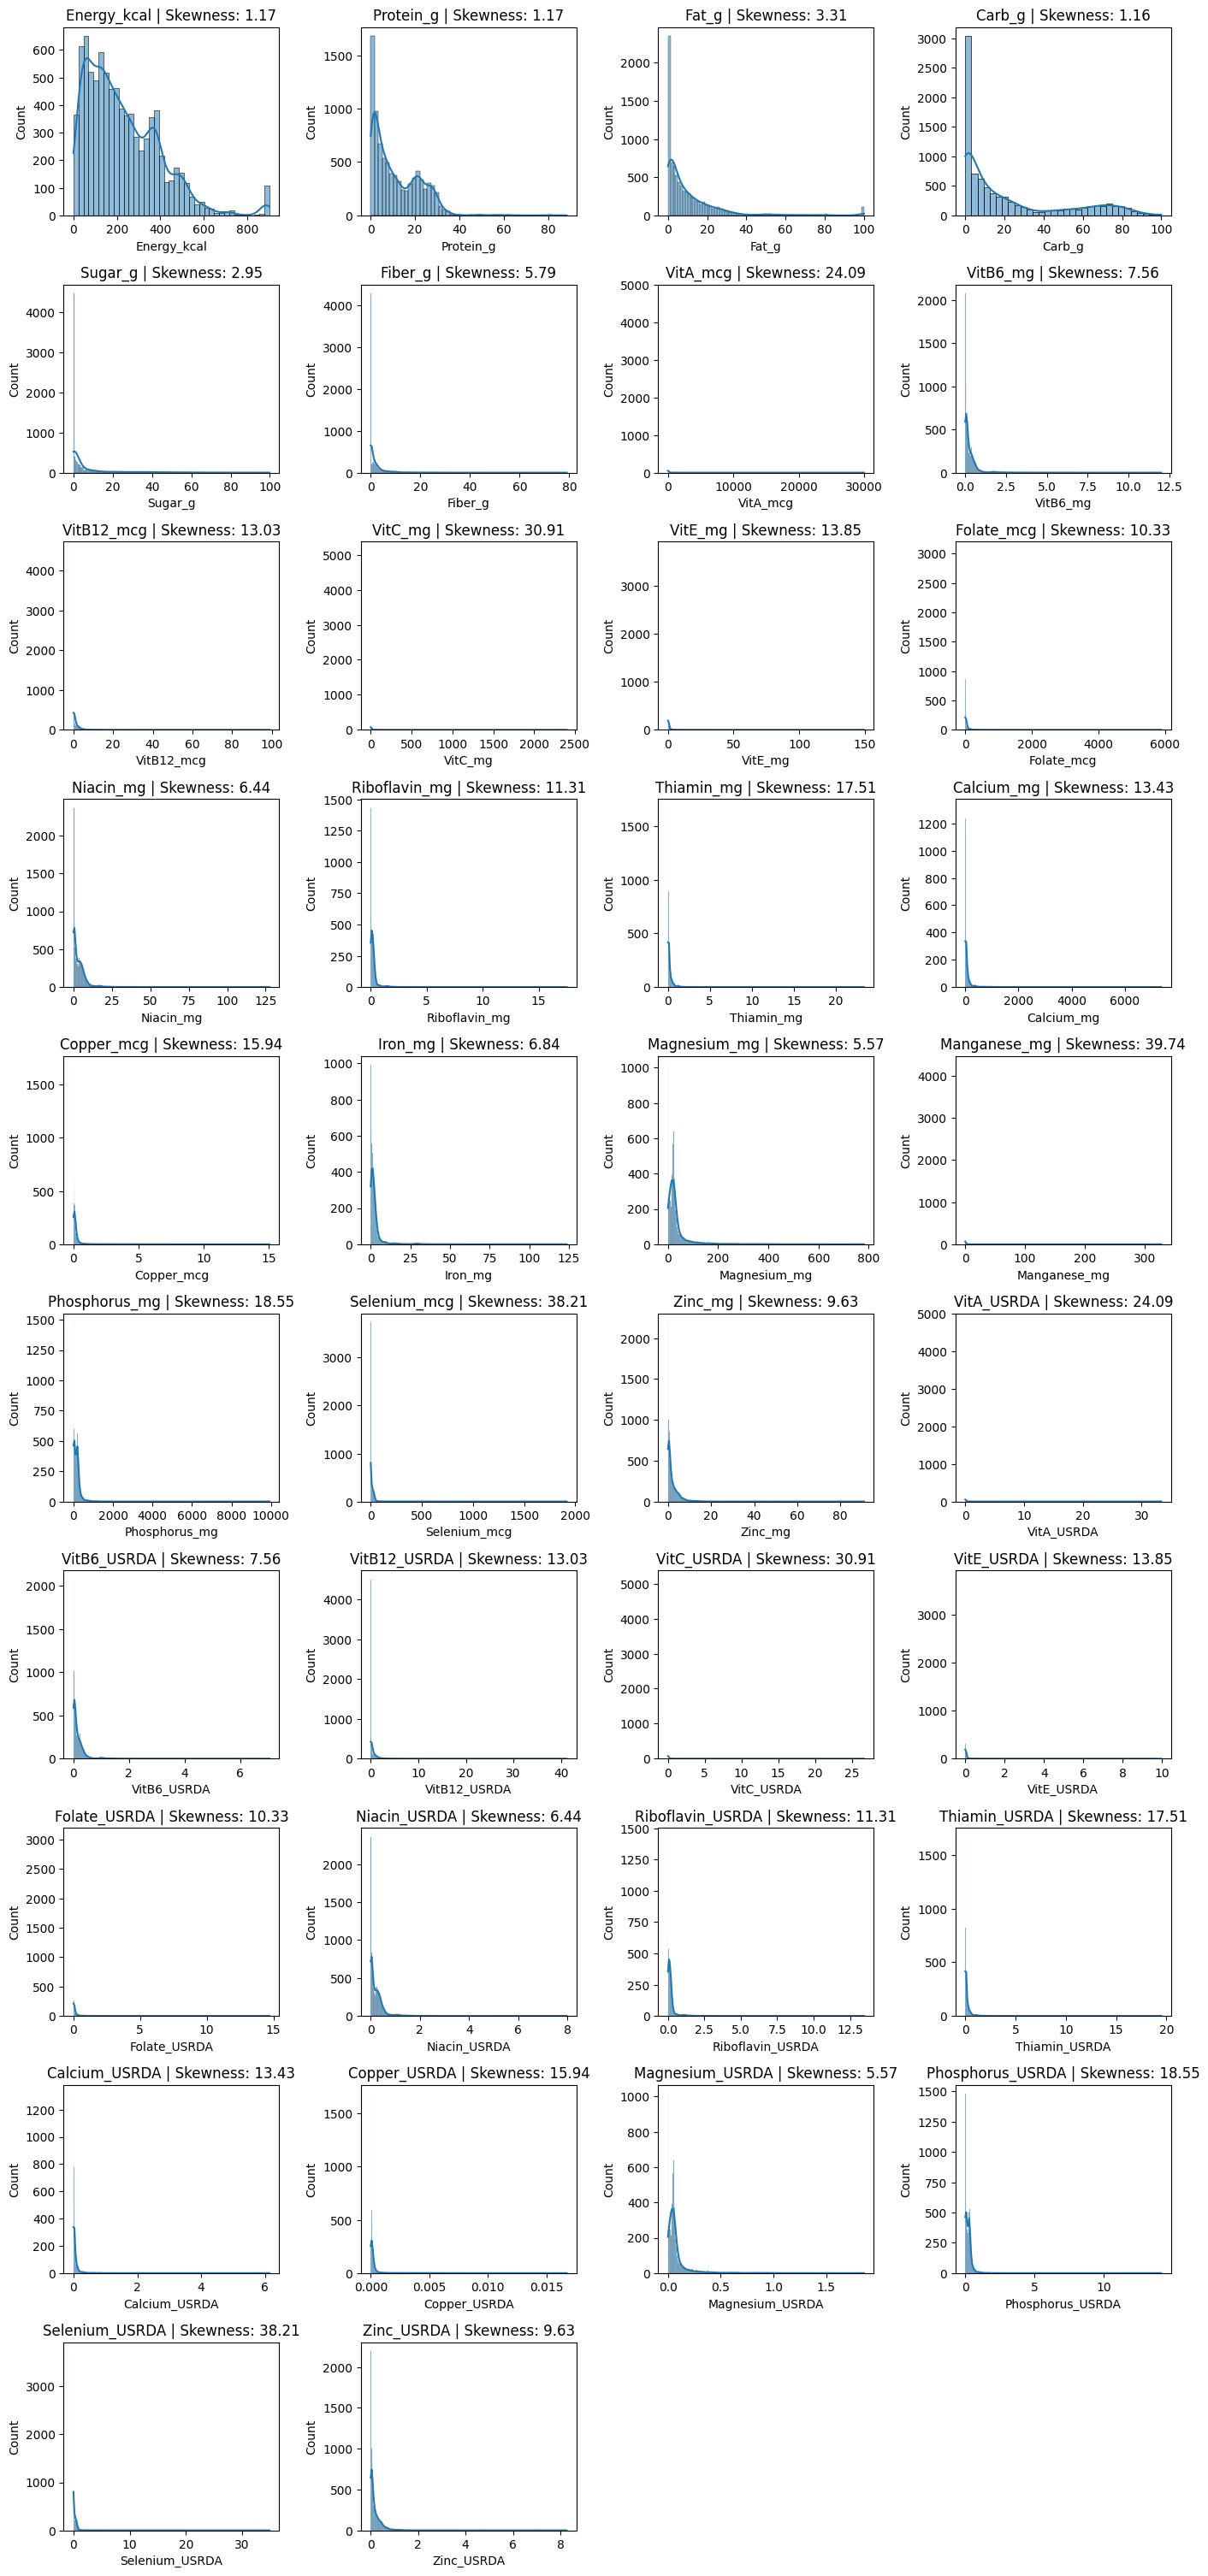

In [7]:
#TODO
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for index, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 4, index)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [8]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
reduced_df = reduced_df + 1
df_boxcoxed = pd.DataFrame(index=reduced_df.index)

for i in reduced_df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(reduced_df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

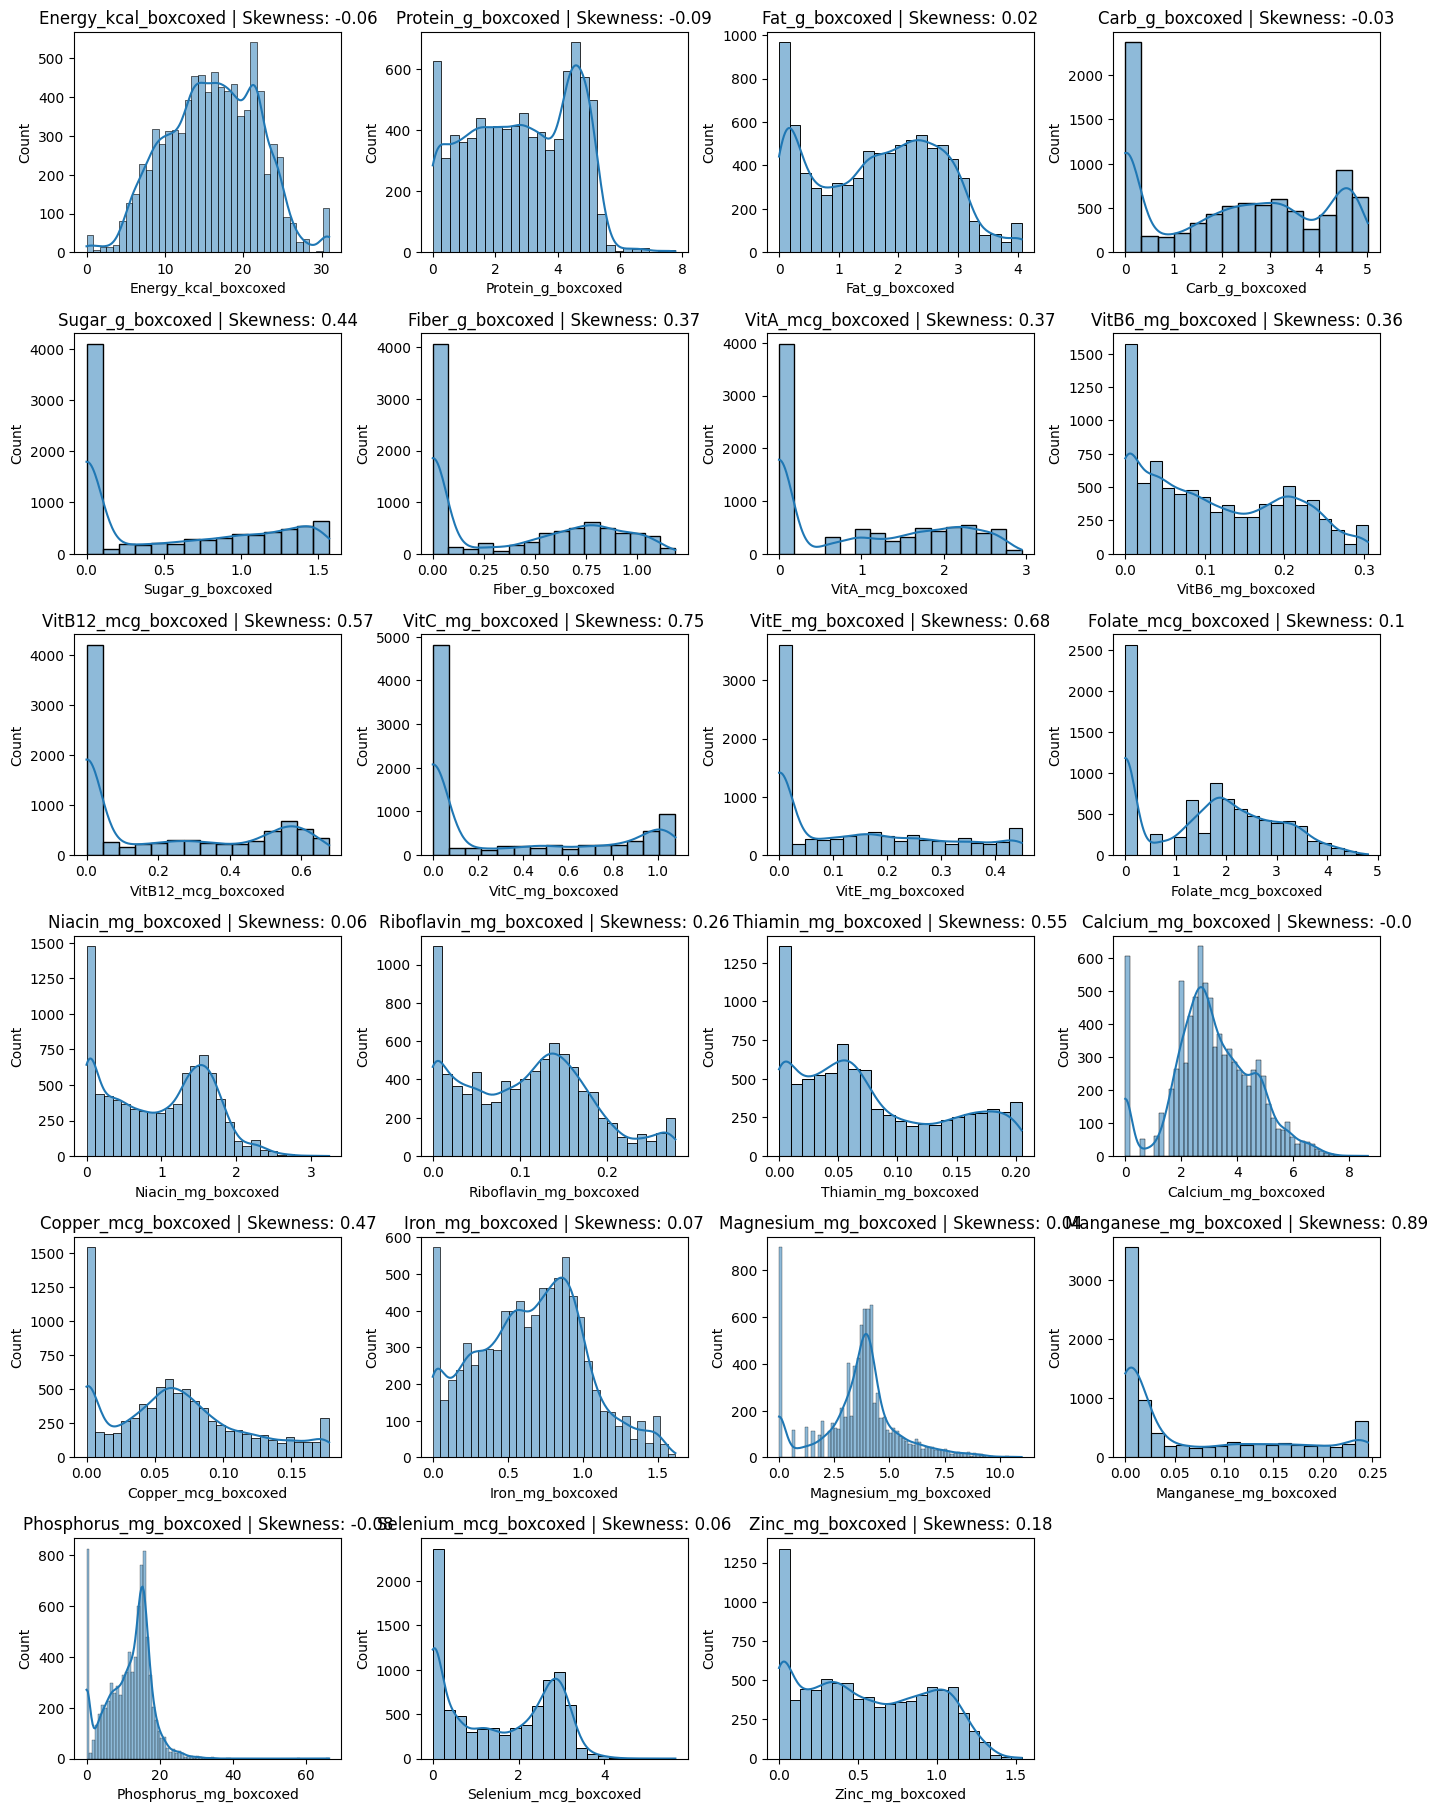

In [9]:
#TODO
numerical_columns = df_boxcoxed.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for index, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 4, index)
    sns.histplot(df_boxcoxed[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_boxcoxed[feature].skew(), 2)}")
    
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [10]:
#TODO
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_boxcoxed), columns=df_boxcoxed.columns)
overall_mean = df_standardized.values.flatten().mean()
overall_std = df_standardized.values.flatten().std()
print(f"Total Mean: {round(overall_mean, 6)}")
print(f"Total STD: {round(overall_std, 6)}")

Total Mean: 0.0
Total STD: 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [11]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [12]:
#TODO
model = CustomPCA(len(df_standardized))
model.fit(df_standardized)
vr = model.get_explained_variance_ratio()

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


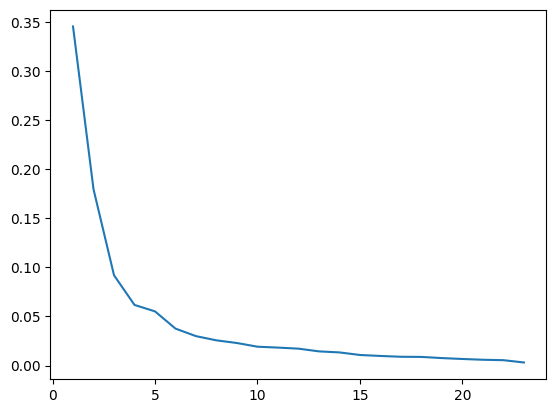

In [13]:
#TODO
plt.plot(range(1, len(vr) + 1), vr)

therefore we are going to pick 5 components

In [14]:
#TODO
#print the total explained variance ration for the first 5 components
model = CustomPCA(5)
model.fit(df_standardized)
vr = model.get_explained_variance_ratio()
print(vr)

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037]


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [15]:
#TODO
model_transform = model.transform(df_standardized)
cols = [f'{i}' for i in range(1, 6)]
new_df = pd.DataFrame(model_transform, columns=cols)
new_df.index = df.index

new_df['FoodGroup'] = df['FoodGroup']
new_df['Descrip'] = df['Descrip']
new_df['ShortDescrip'] = df['ShortDescrip']
new_df.head()

,1,2,3,4,5,FoodGroup,Descrip,ShortDescrip
ID,,,,,,,,
1001,2.638414,1.702512,-1.283725,-3.759546,-2.413650,Dairy and Egg Products,"Butter, salted","BUTTER,WITH SALT"
1002,2.537931,1.550464,-1.279816,-3.634065,-2.492683,Dairy and Egg Products,"Butter, whipped, with salt","BUTTER,WHIPPED,WITH SALT"
1003,3.751335,2.080190,-2.067932,-3.668154,-2.457203,Dairy and Egg Products,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS"
1004,-2.000578,1.361858,0.395834,-2.432792,-0.887796,Dairy and Egg Products,"Cheese, blue","CHEESE,BLUE"
1005,-1.582713,1.321484,0.238444,-2.597599,-1.286317,Dairy and Egg Products,"Cheese, brick","CHEESE,BRICK"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

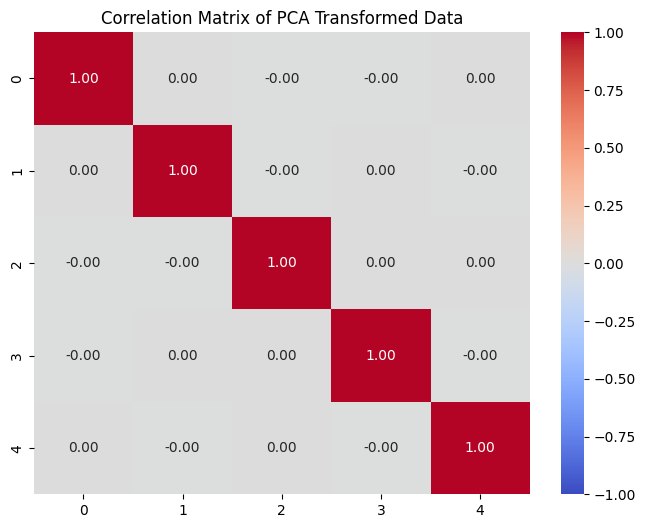

In [16]:
#TODO
correlation_matrix_pca = np.corrcoef(model_transform, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of PCA Transformed Data')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

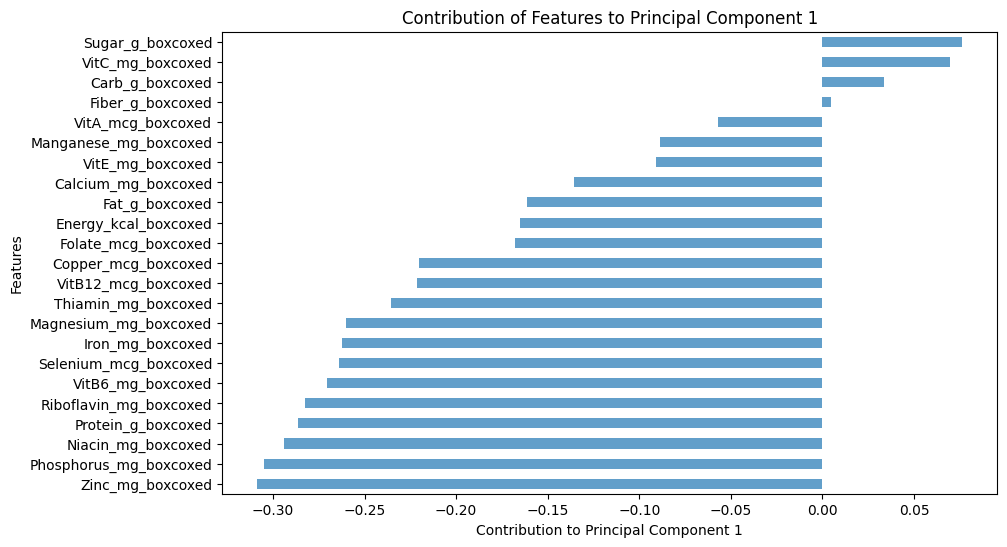

In [17]:
#TODO
components = model.get_components()
num_features = reduced_df.shape[1]
features = df_standardized.columns
plt.figure(figsize=(10, 6))
pc1_contributions = pd.Series(components[:, 0], index=features).sort_values()
pc1_contributions.plot.barh(alpha=0.7)
plt.xlabel('Contribution to Principal Component 1')
plt.ylabel('Features')
plt.title('Contribution of Features to Principal Component 1')
plt.show()

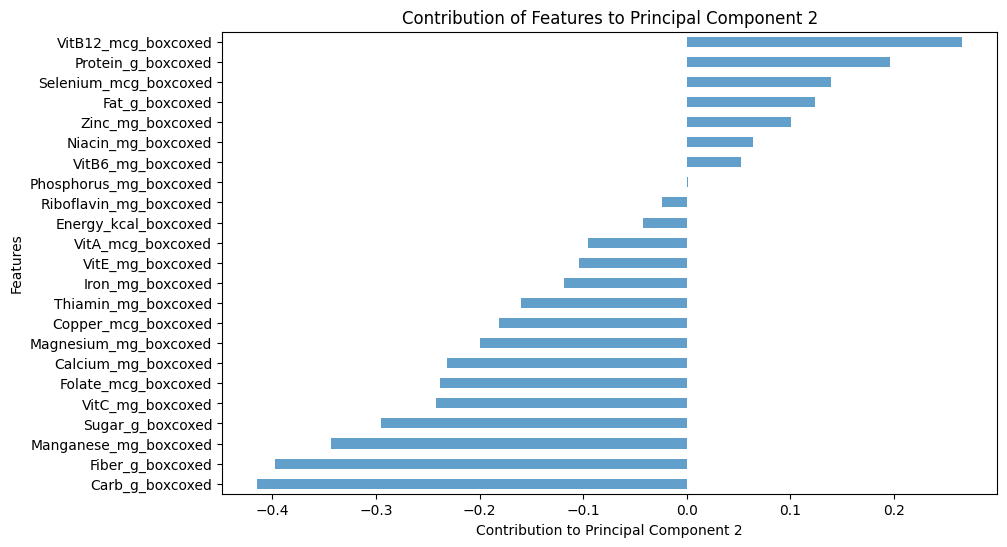

In [18]:
#TODO
plt.figure(figsize=(10, 6))
pc1_contributions = pd.Series(components[:, 1], index=features).sort_values()
pc1_contributions.plot.barh(alpha=0.7)
plt.xlabel('Contribution to Principal Component 2')
plt.ylabel('Features')
plt.title('Contribution of Features to Principal Component 2')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">
The plots of the contributions of each feature to the first and second principal components (PC1 and PC2) help us understand which features are most influential in these components and how they contribute to the variance in the dataset. Here's how to interpret these plots:

### Interpreting the Contribution Plots
1. Magnitude of Contributions:

- Large Absolute Values: Features with large absolute values (either positive or negative) contribute more significantly to the principal component.
- Small Absolute Values: Features with small absolute values have less influence on the principal component.

2. Sign of Contributions:

- Positive Values: A positive contribution indicates that as the feature value increases, the principal component score increases.
- Negative Values: A negative contribution indicates that as the feature value increases, the principal component score decreases.

### First Principal Component (PC1)
The plot of the contributions to PC1 shows which features are most important in capturing the maximum variance in the data:

- Key Features: Features with the largest absolute contributions (positive or negative) are the key features that drive the variance captured by PC1.
- Interpretation: If certain features have very high positive or negative contributions, PC1 can be interpreted as a combination of these features.

### Second Principal Component (PC2)
The plot of the contributions to PC2 shows the features that are most important in capturing the variance in the data orthogonal to PC1:

- Key Features: Features with the largest absolute contributions to PC2 are the key features that drive the variance captured by this component, independent of the variance captured by PC1.
- Interpretation: If certain features have very high positive or negative contributions, PC2 can be interpreted as a combination of these features, capturing different aspects of the data variability.

### Combined Interpretation
- Orthogonality: PC1 and PC2 are orthogonal, meaning they capture independent directions of maximum variance in the data.
- Dominant Features: By comparing the contribution plots for PC1 and PC2, we can identify features that are consistently influential across components and those that are specifically important for capturing different aspects of the data.
</span>

### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

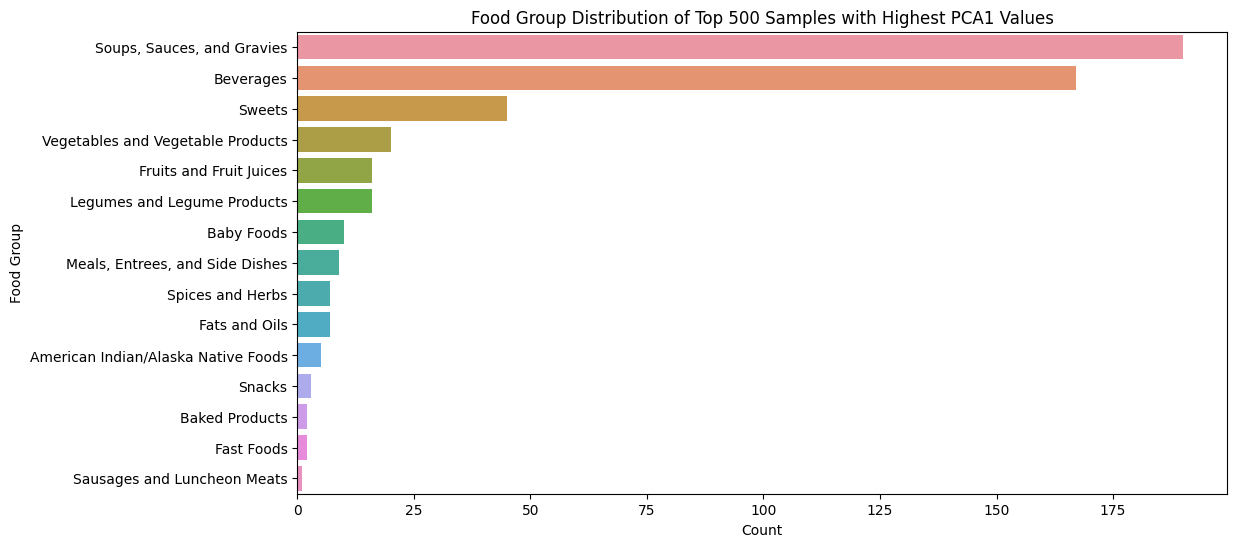

In [19]:
#TODO
model = CustomPCA(5)
model.fit(df_standardized)
model_transform = model.transform(df_standardized)
df_pca = df.copy()
df_pca['PCA1'] = model_transform[:, 0]
df_pca['PCA2'] = model_transform[:, 1]
top_500 = df_pca.nlargest(500, 'PCA1')

plt.figure(figsize=(12, 6))
sns.countplot(y=top_500['FoodGroup'], order=top_500['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution of Top 500 Samples with Highest PCA1 Values')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.show()

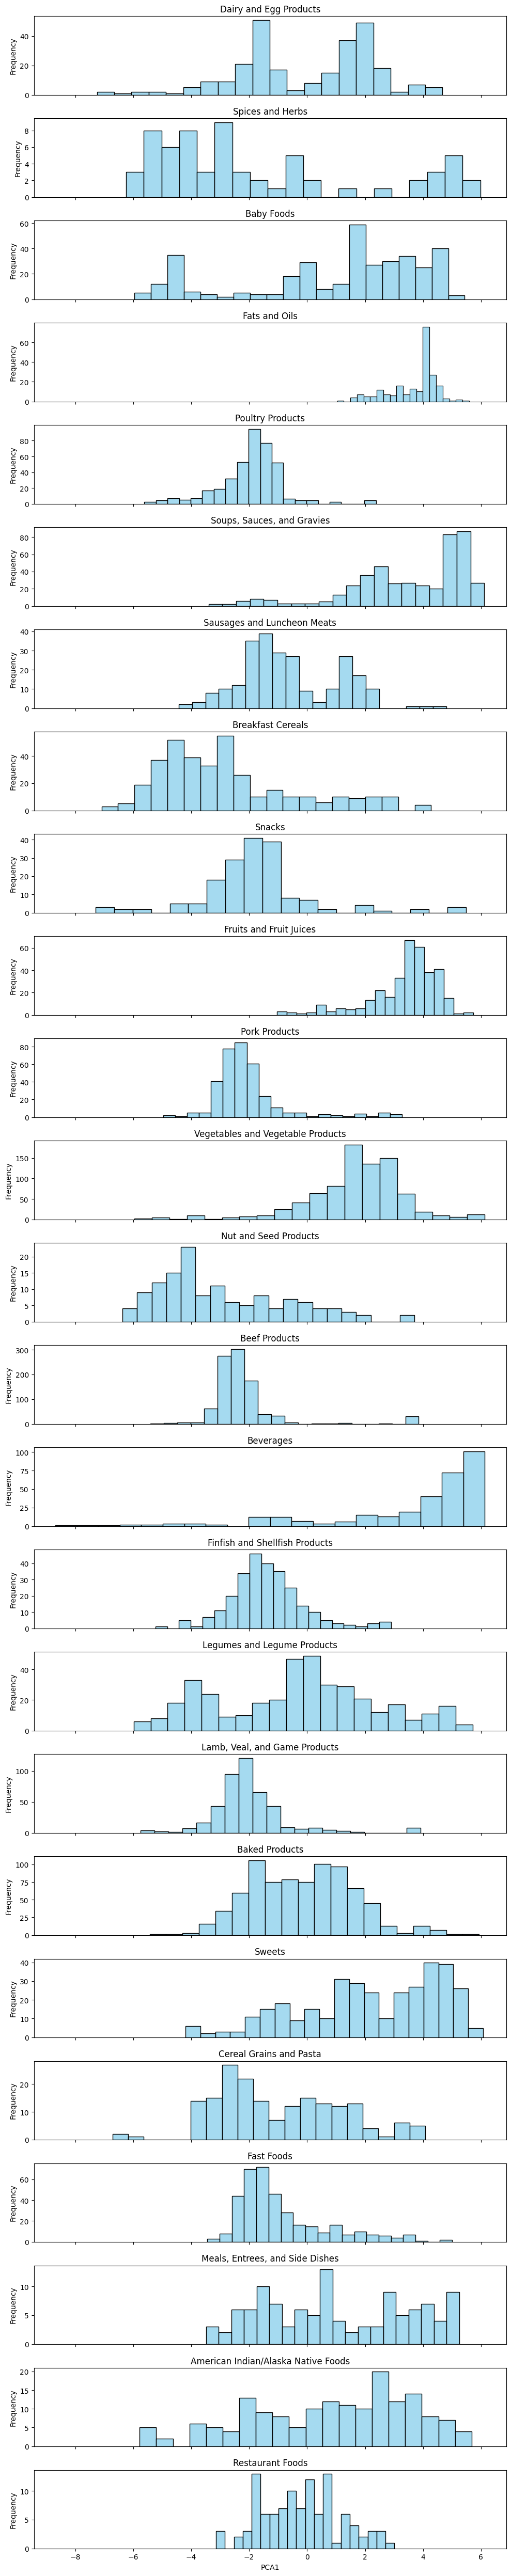

In [20]:
#TODO
fgs = df_pca['FoodGroup'].unique()
fig, axes = plt.subplots(len(fgs), 1, figsize=(10, len(fgs)*2), sharex=True)

for i, fg in enumerate(fgs):
    sns.histplot(df_pca[df_pca['FoodGroup'] == fg]['PCA1'], ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(fg)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Do the same for pca2.

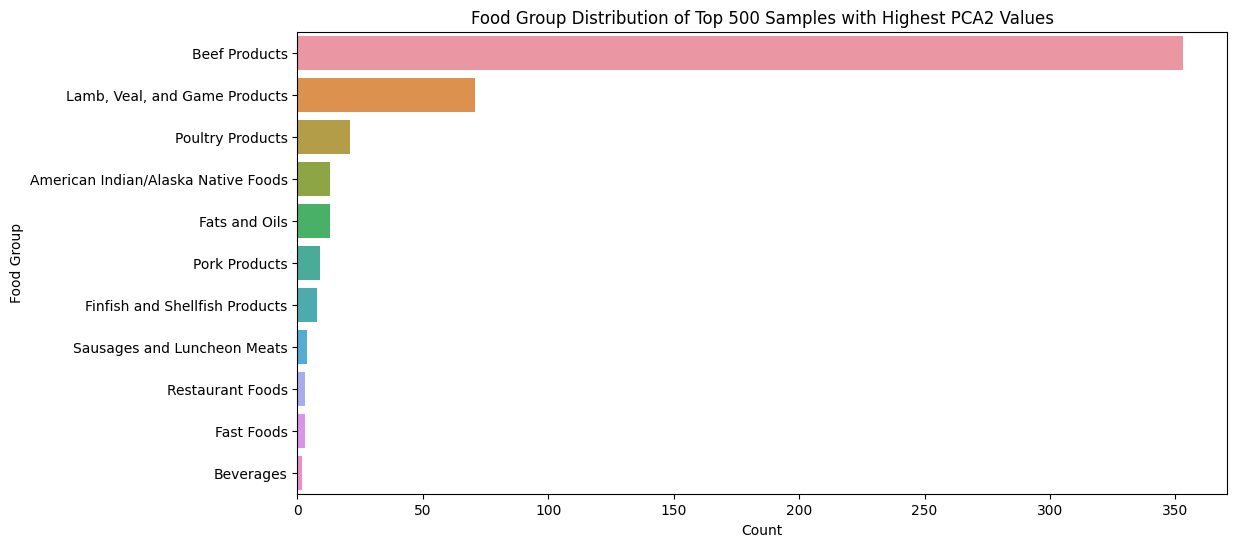

In [21]:
#TODO
top_500 = df_pca.nlargest(500, 'PCA2')

plt.figure(figsize=(12, 6))
sns.countplot(y=top_500['FoodGroup'], order=top_500['FoodGroup'].value_counts().index)
plt.title('Food Group Distribution of Top 500 Samples with Highest PCA2 Values')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.show()

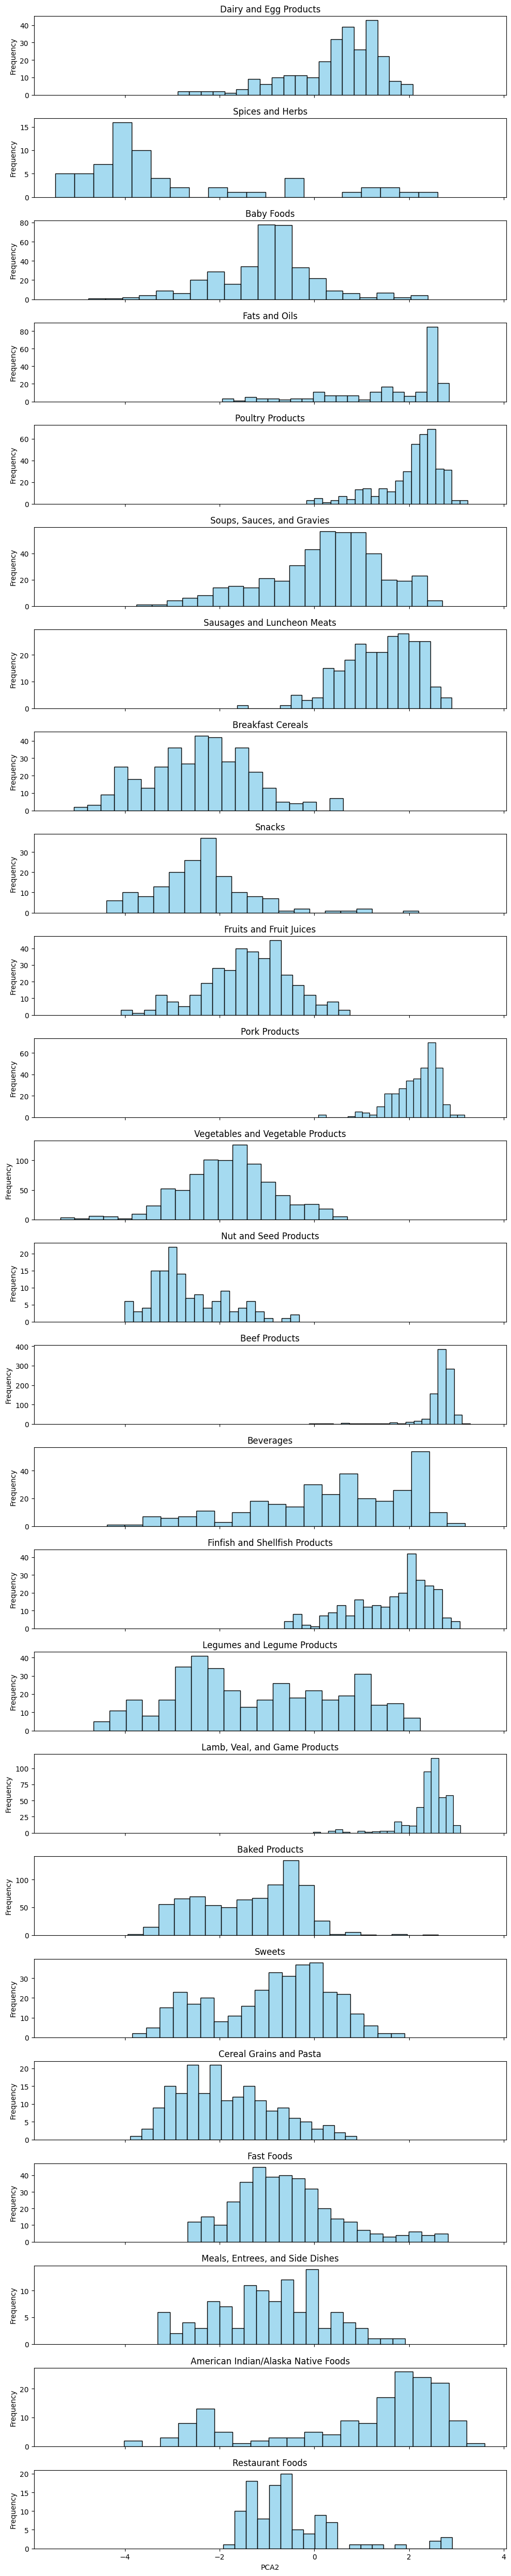

In [22]:
#TODO
fgs = df_pca['FoodGroup'].unique()
fig, axes = plt.subplots(len(fgs), 1, figsize=(10, len(fgs)*2), sharex=True)

for i, fg in enumerate(fgs):
    sns.histplot(df_pca[df_pca['FoodGroup'] == fg]['PCA2'], ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(fg)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


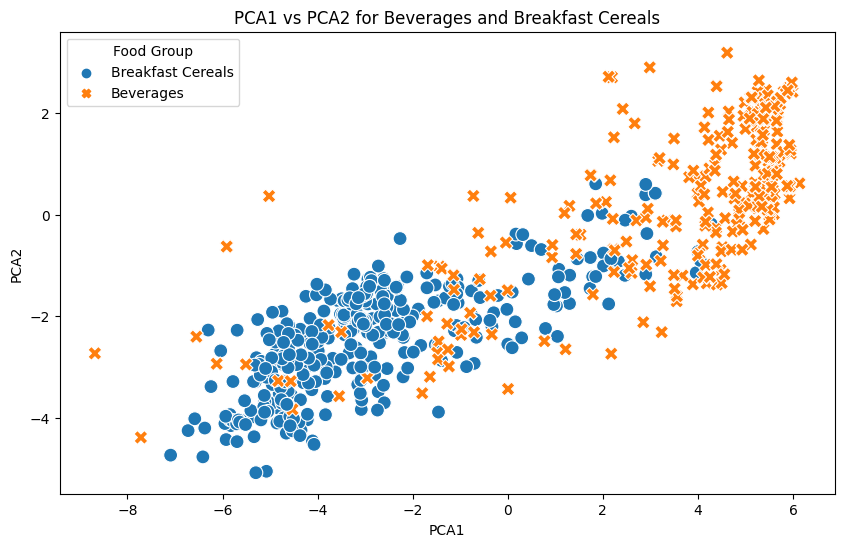

In [23]:
#TODO
filtered_df = df_pca[df_pca['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='PCA1', y='PCA2', hue='FoodGroup', style='FoodGroup', s=100)
plt.title('PCA1 vs PCA2 for Beverages and Breakfast Cereals')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Food Group')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
From the plots in the last subsection (distributions of PCA1 for each food group and the scatter plot of PCA1 vs. PCA2 for "Beverages" and "Breakfast Cereals"), we can derive several insights:

#### Distribution of PCA1 for Each Food Group
###### What We Plotted:
We plotted the distribution of PCA1 values for each food group using individual histograms.
###### Insights:
1. Contribution to Principal Component 1 (PCA1):

- Feature Importance: The histograms show which food groups have higher or lower PCA1 values. This can indicate how much variance each food group contributes to the first principal component.
- Group Characteristics: If a food group has a wide distribution with high PCA1 values, it suggests that the features defining this group are significant in explaining the variance captured by PCA1.
- Comparison Between Groups: By comparing the distributions, we can see which food groups are similar or different in terms of their contribution to PCA1.

2. Overlap and Separation:

- Overlap: If the distributions of different food groups overlap significantly, it suggests that the groups are not well-separated in the PCA1 space, indicating similarities in their feature sets.
- Separation: Distinct distributions with little overlap suggest that the food groups have distinct feature sets that contribute differently to the variance captured by PCA1.

#### PCA1 vs. PCA2 for Beverages and Breakfast Cereals
###### What We Plotted:
We plotted a scatter plot of PCA1 vs. PCA2 values specifically for "Beverages" and "Breakfast Cereals".
###### Insights:
1. Group Clustering:

- Cluster Formation: We can observe how the data points for "Beverages" and "Breakfast Cereals" cluster in the PCA space. This helps in understanding if these food groups form distinct clusters or if they overlap significantly.
- Centroid and Spread: The center and spread of each group's points provide information about the central tendency and variability within each group.

2. Dimensionality Reduction:

- Effective Separation: If the points of "Beverages" and "Breakfast Cereals" are well-separated along PCA1 and PCA2, it indicates that PCA has effectively reduced the dimensions while preserving the separation between these groups.
- Overlap and Inter-group Similarity: If there is overlap, it suggests that "Beverages" and "Breakfast Cereals" share similar characteristics in the features that were used for PCA.

3. Understanding Relationships:

- Direction of Variance: The direction in which the points spread along PCA1 and PCA2 can indicate the primary directions of variance. For example, if "Beverages" have high PCA1 values and low PCA2 values, it suggests that the first component captures more variance related to "Beverages".
- Group Characteristics: By examining which group lies where, we can infer specific characteristics. For instance, if "Beverages" cluster around high PCA1 values, it implies that the features contributing to PCA1 are more dominant in "Beverages". 
    
    
#### Practical Implications
1. Feature Significance:

- The distributions can help identify which features (nutrients) are most significant for different food groups. This is useful for nutritional analysis and dietary planning.

2. Group Differentiation:

- Understanding how food groups differ in the PCA space can aid in better categorization and classification of food items based on their nutritional content.
    
3. Dimensionality Reduction:

- The effectiveness of PCA in reducing dimensionality while maintaining meaningful separation of groups can be assessed. This is crucial for simplifying data without losing important information.
</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">
The last plot (the scatter plot of PCA1 vs. PCA2 for "Beverages" and "Breakfast Cereals") and the distribution of PCA1 for each food group are related in several important ways. Together, they provide a comprehensive view of how the food groups are distributed in the PCA space and how the principal components (PCA1 and PCA2) differentiate these groups.

#### Relationship Between the Plots
###### Scatter Plot of PCA1 vs. PCA2
1. Two-Dimensional Separation:

- The scatter plot shows how "Beverages" and "Breakfast Cereals" are separated in a two-dimensional space defined by PCA1 and PCA2. This plot provides insight into how these two principal components together can distinguish between the two food groups.
2. Clustering and Overlap:

- The clustering of points in the scatter plot indicates how tightly or loosely the data points for each food group are grouped. Overlap in the scatter plot would suggest similarity between the groups in the principal component space, while clear separation would indicate distinct differences.

###### Distribution of PCA1 for Each Food Group
1. One-Dimensional View:

- The histograms show the distribution of PCA1 values for each food group individually. This one-dimensional view helps in understanding how each food group contributes to the variance captured by PCA1.
    
2. Central Tendency and Spread:

- The histograms reveal the central tendency (mean/median) and spread (variance) of PCA1 values for each food group. This can indicate whether the groups are centered around similar or different PCA1 values.
    
    
#### Integrating Insights from Both Plots
1. Understanding Group Separation:

- Scatter Plot Insight: If "Beverages" and "Breakfast Cereals" are well-separated along PCA1 in the scatter plot, this separation should also be reflected in their PCA1 value distributions. For example, "Beverages" might cluster at higher PCA1 values and "Breakfast Cereals" at lower values.
- Histogram Insight: The histograms should show different peaks for "Beverages" and "Breakfast Cereals" if they are well-separated along PCA1. If the peaks overlap significantly, it would indicate that PCA1 alone is not sufficient to differentiate the groups, and PCA2's contribution becomes crucial.

2. Variance Explanation:

- Scatter Plot Insight: PCA2 adds another dimension of variance that can help separate the food groups if PCA1 alone isn't sufficient. For instance, if "Beverages" have a wide spread along PCA2, it indicates significant variance in that direction.
- Histogram Insight: The spread of the histogram can explain how much of the variance PCA1 captures within each group. A wider histogram suggests that PCA1 captures more within-group variance.

3. Dimensionality Reduction:

- Scatter Plot Insight: The effectiveness of PCA as a dimensionality reduction technique can be assessed by how well PCA1 and PCA2 together separate the groups. Good separation implies that most of the variance is captured in the first two components.
- Histogram Insight: The histograms provide a simpler, one-dimensional view of how PCA1 alone differentiates the groups. This is useful for understanding the primary direction of variance.
    
#### Summary
The scatter plot of PCA1 vs. PCA2 provides a two-dimensional view of how the food groups are distributed in the PCA space, while the histograms of PCA1 for each food group offer a one-dimensional view. Together, these plots help in understanding the distribution, separation, and variance explanation of the food groups in the PCA-transformed feature space. By integrating insights from both plots, we gain a comprehensive understanding of the data's structure and the effectiveness of PCA in capturing the key patterns.
</span>

